# MLDP proj 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries loaded successfully")

Libraries loaded successfully


In [2]:
df = pd.read_csv('Flat prices(mld project).csv')
df 

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
92265,2021-02,YISHUN,EXECUTIVE,406,YISHUN AVE 6,10 TO 12,148.0,Maisonette,1988,66 years 08 months,655000.0
92266,2021-02,YISHUN,EXECUTIVE,355,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,66 years 10 months,650000.0
92267,2021-02,YISHUN,EXECUTIVE,364,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,66 years 02 months,607000.0
92268,2021-02,YISHUN,EXECUTIVE,828,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,66 years,670000.0


This is done to understand the basic statistics (mean, min, max, etc.) and data types of the dataset.
Exploratory Data Analysis (EDA) helps to spot potential data issues early, such as incorrect types, missing values, or anomalies.

In [3]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,92270.000000,92270.000000,9.227000e+04
mean,97.768362,1994.444175,4.448869e+05
std,24.263575,13.064066,1.548243e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1984.000000,3.330000e+05
50%,95.000000,1995.000000,4.150000e+05
75%,113.000000,2003.000000,5.200000e+05
max,249.000000,2019.000000,1.258000e+06


This line generates descriptive statistics for all numerical columns in the DataFrame. It helps give a quick overview of the dataset's distribution and central tendencies. The output includes:

count – number of non-null entries

mean – average value

std – standard deviation (spread of values)

min – minimum value

25% / 50% / 75% – quartile values (Q1, median, Q3)

max – maximum value

This is useful during exploratory data analysis (EDA) to identify:

Potential outliers (very large/small values)

Skewed distributions (mean far from median)

Data entry errors (e.g., extremely high prices)

Scaling needs (e.g., if values differ by orders of magnitude)

In [4]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
dtype: object

# Data cleaning 

In [6]:
df.duplicated()
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 220


This code identifies and counts duplicate rows within the dataset. Detecting duplicates is essential because repeated entries can bias the model by overemphasizing certain patterns, leading to skewed training results and inaccurate evaluation metrics like the R² score. By addressing these duplicates, we ensure that the dataset is clean, representative, and that the model learns from unique information rather than redundant data.

In [7]:
df.drop_duplicates(inplace=True)
print("Number of duplicate rows after removal:", df.duplicated().sum())

Number of duplicate rows after removal: 0


I removed duplicate rows using df.drop_duplicates() to prevent model bias and reduce the risk of overfitting. Duplicate transactions can artificially overweight certain price points, which may distort the model’s understanding of price patterns, skew the R² score, and lower its ability to generalize to new data. Cleaning these duplicates ensures the dataset remains representative of the true market diversity, leading to more reliable and accurate predictions.

In [8]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
92265,2021-02,YISHUN,EXECUTIVE,406,YISHUN AVE 6,10 TO 12,148.0,Maisonette,1988,66 years 08 months,655000.0
92266,2021-02,YISHUN,EXECUTIVE,355,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,66 years 10 months,650000.0
92267,2021-02,YISHUN,EXECUTIVE,364,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,66 years 02 months,607000.0
92268,2021-02,YISHUN,EXECUTIVE,828,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,66 years,670000.0


In [9]:
import pandas as pd

# Convert 'month' to datetime
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')

# Extract year and month number as numeric features
df['year'] = df['month'].dt.year
df['month_num'] = df['month'].dt.month

# Drop original 'month' column
df = df.drop(columns=['month'])

# Fix the storey_range column
df['storey_range'] = df['storey_range'].str.strip()
df['storey_range'] = df['storey_range'].replace({'33': '31 TO 33'})

# Drop irrelevant columns
df = df.drop(columns=['flat_model', 'lease_commence_date', 'remaining_lease','block', 'street_name'])

# One-hot encode categorical features (only once!)
df = pd.get_dummies(df, columns=['town', 'flat_type', 'storey_range'])

This code cleans and prepares the HDB resale dataset for machine learning, particularly regression models like Random Forest. It first converts the month column into a proper datetime format, then extracts numerical year and month_num features for model training while dropping the original date column. The storey_range values are standardized by removing extra whitespace and correcting mislabeled entries to ensure consistent categories. Irrelevant or text‑heavy columns, such as flat_model, street_name, and block, are removed to reduce noise and prevent data leakage. Finally, categorical features (town, flat_type, storey_range) are one‑hot encoded into numeric indicator columns, enabling the model to process them effectively and improving its predictive accuracy

# EDA and Visualisation insights

In [10]:
X = df.drop('resale_price', axis=1)
Y = df['resale_price']
df

,floor_area_sqm,resale_price,year,month_num,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,...,storey_range_22 TO 24,storey_range_25 TO 27,storey_range_28 TO 30,storey_range_31 TO 33,storey_range_34 TO 36,storey_range_37 TO 39,storey_range_40 TO 42,storey_range_43 TO 45,storey_range_46 TO 48,storey_range_49 TO 51
0,44.0,232000.0,2017,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,67.0,250000.0,2017,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,67.0,262000.0,2017,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,68.0,265000.0,2017,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,67.0,265000.0,2017,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92265,148.0,655000.0,2021,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
92266,146.0,650000.0,2021,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
92267,146.0,607000.0,2021,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
92268,142.0,670000.0,2021,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


This step separates the dataset into features (X) and the target variable (Y) for supervised learning. The resale_price column is assigned to Y because it is the value we aim to predict, while all other columns in X serve as input features. Clearly defining features and the target ensures the model can learn patterns in the data without accidentally using the answer itself for training.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)   

This step splits the dataset into 70% training and 30% testing using train_test_split. The training set is used for the model to learn patterns, while the testing set evaluates how well it generalizes to unseen data. Setting random_state=42 ensures the split is reproducible for consistent model evaluation

# Model Selection and Performance

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC

Cl = ColumnTransformer
Pl = Pipeline
Lr = LinearRegression
RidgeRegressor = Ridge
LassoRegressor = Lasso
DecisionTreeRegressor = DecisionTreeRegressor
RandomForestRegressor = RandomForestRegressor
GradientBoostingRegressor = GradientBoostingRegressor
KNR = KNeighborsRegressor
SVC = SVC
Lor = LogisticRegression

This block imports key classes from scikit-learn for building regression and classification models as well as modular ML pipelines. ColumnTransformer and Pipeline are used to create preprocessing and modeling workflows. Multiple models are imported, including linear models (Linear Regression, Ridge, Lasso), tree-based models (Decision Tree, Random Forest, Gradient Boosting), neighbor-based (KNN), and classification models (Logistic Regression, SVC). Aliases are assigned to some imports for concise references when constructing pipelines or models, improving code readability

In [13]:
df.nunique()

floor_area_sqm                 162
resale_price                  2634
year                             5
month_num                       12
town_ANG MO KIO                  2
town_BEDOK                       2
town_BISHAN                      2
town_BUKIT BATOK                 2
town_BUKIT MERAH                 2
town_BUKIT PANJANG               2
town_BUKIT TIMAH                 2
town_CENTRAL AREA                2
town_CHOA CHU KANG               2
town_CLEMENTI                    2
town_GEYLANG                     2
town_HOUGANG                     2
town_JURONG EAST                 2
town_JURONG WEST                 2
town_KALLANG/WHAMPOA             2
town_MARINE PARADE               2
town_PASIR RIS                   2
town_PUNGGOL                     2
town_QUEENSTOWN                  2
town_SEMBAWANG                   2
town_SENGKANG                    2
town_SERANGOON                   2
town_TAMPINES                    2
town_TOA PAYOH                   2
town_WOODLANDS      

The df.nunique() function in pandas returns the number of unique values in each column of the DataFrame. This is useful for quickly understanding the variability and structure of your dataset. For example, columns with very few unique values may represent categorical features suitable for one-hot encoding, while columns with many unique values are likely continuous or identifiers. This step helps in data exploration by identifying potential features for modeling, detecting low-variance columns, and guiding preprocessing decisions.

In [14]:
df.dtypes

floor_area_sqm                float64
resale_price                  float64
year                            int32
month_num                       int32
town_ANG MO KIO                  bool
town_BEDOK                       bool
town_BISHAN                      bool
town_BUKIT BATOK                 bool
town_BUKIT MERAH                 bool
town_BUKIT PANJANG               bool
town_BUKIT TIMAH                 bool
town_CENTRAL AREA                bool
town_CHOA CHU KANG               bool
town_CLEMENTI                    bool
town_GEYLANG                     bool
town_HOUGANG                     bool
town_JURONG EAST                 bool
town_JURONG WEST                 bool
town_KALLANG/WHAMPOA             bool
town_MARINE PARADE               bool
town_PASIR RIS                   bool
town_PUNGGOL                     bool
town_QUEENSTOWN                  bool
town_SEMBAWANG                   bool
town_SENGKANG                    bool
town_SERANGOON                   bool
town_TAMPINE

The `df.dtypes` attribute in pandas displays the data type of each column in your DataFrame. It helps you quickly identify whether a column is numeric (`int64` or `float64`), categorical/object (`object`), boolean, or datetime (`datetime64[ns]`). Understanding column data types is essential for data preprocessing because it determines how each feature should be handled—for example, numeric columns can be used directly in regression models, categorical columns may need encoding, and datetime columns often require feature extraction (like year or month). This step ensures your dataset is properly prepared for analysis or machine learning.


In [15]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define regressors
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),  
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor()
}

print("\Regression Results:")
model_names = []
r2_scores = []

# Evaluate regressors
print("\nRegression Results:")
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    model_names.append(name)
    r2_scores.append(r2)
    print(f"{name}: RMSE = {rmse:.2f}, MAE = {mae:.2f}, R² = {r2:.4f}")

\Regression Results:

Regression Results:
LinearRegression: RMSE = 76620.47, MAE = 58317.27, R² = 0.7507
Ridge: RMSE = 76617.25, MAE = 58319.32, R² = 0.7507


C:\Users\Ethan Gwee E-Rui\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.796e+13, tolerance: 1.560e+11
  model = cd_fast.enet_coordinate_descent(


Lasso: RMSE = 76618.46, MAE = 58316.98, R² = 0.7507
DecisionTreeRegressor: RMSE = 65521.00, MAE = 42444.38, R² = 0.8177
RandomForestRegressor: RMSE = 52652.91, MAE = 35359.48, R² = 0.8823
GradientBoostingRegressor: RMSE = 72450.82, MAE = 52944.04, R² = 0.7771
KNeighborsRegressor: RMSE = 78667.23, MAE = 51658.48, R² = 0.7372


This code performs a baseline model comparison across multiple regression algorithms to evaluate which performs best on the given dataset. It first imports a variety of regression models—LinearRegression, Ridge, and Lasso (linear models with and without regularization), DecisionTreeRegressor (tree-based model), RandomForestRegressor and GradientBoostingRegressor (ensemble tree models), and KNeighborsRegressor (distance-based model)—along with evaluation metrics like RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and R² (coefficient of determination). The models are stored in a dictionary for easy iteration. For each model, it is trained on the training set (X_train, y_train), used to predict on the test set (X_test), and evaluated with three metrics: RMSE (measures prediction error magnitude), MAE (measures average absolute error), and R² (indicates how well the model explains variance in the target). Results are printed for quick comparison, and R² scores are also collected in lists (model_names and r2_scores) to enable later visualization or ranking of model performance. This step helps quickly identify which regression algorithm is most promising before performing hyperparameter tuning.

In [16]:
# --- After your baseline model comparison (before saving the model) ---

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': [ None, 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit to training data
random_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters (RandomizedSearchCV):", random_search.best_params_)
print("Best R² (CV):", random_search.best_score_)

# Evaluate on test set
best_rf_random = random_search.best_estimator_
y_pred_random = best_rf_random.predict(X_test)
r2_random = r2_score(y_test, y_pred_random)
print(f"Test R² (RandomizedSearchCV): {r2_random:.4f}")

# --- Continue with your existing code (e.g., SHAP or model saving) ---

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters (RandomizedSearchCV): {'bootstrap': True, 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 333}
Best R² (CV): 0.8853696211400025
Test R² (RandomizedSearchCV): 0.8915


This code performs **hyperparameter tuning for a Random Forest regression model** using `RandomizedSearchCV` to find the best-performing model configuration efficiently. First, a search space (`param_dist`) is defined, specifying ranges or options for key hyperparameters: the number of trees (`n_estimators`), maximum tree depth (`max_depth`), minimum samples required to split or be a leaf (`min_samples_split` and `min_samples_leaf`), the number of features considered for each split (`max_features`), and whether to use bootstrapped samples (`bootstrap`). `RandomizedSearchCV` is then initialized to randomly test 50 different hyperparameter combinations (`n_iter=50`) using 3-fold cross-validation (`cv=3`) and evaluate performance with the R² score (`scoring='r2'`). It runs in parallel across all CPU cores (`n_jobs=-1`) and shows progress with `verbose=1`. After fitting on the training data (`X_train`, `y_train`), it prints the best parameters and the best cross-validation R² score. The best model (`best_estimator_`) is then evaluated on the test set to calculate its R² score (`r2_score`), providing a measure of how well the tuned Random Forest generalizes to unseen data. This step is typically followed by model interpretation, feature importance analysis, or saving the model for later use. This code takes shorter time compared to GridSearch so i used this instead. It also increased the R2 value from 0.8827 to highest 0.8915

Why RandomizedSearchCV Was Preferred Over GridSearchCV
During hyperparameter tuning for my Random Forest regression model, I initially applied GridSearchCV to exhaustively search all combinations within a defined parameter grid. However, I observed the following:

Baseline model R²: 0.8827

After GridSearchCV: 0.8819 (slightly decreased)

This performance drop indicates that the selected grid was either too restrictive or led to overfitting during cross-validation, resulting in no real improvement on the test set. GridSearchCV also tested all combinations, which was computationally expensive without yielding better results.

In contrast, I switched to RandomizedSearchCV, which:

Randomly samples combinations of hyperparameters from defined distributions.

Covers a wider search space more efficiently without testing every possible combination.

Reduces computation time compared to exhaustive grid search.

Can escape suboptimal regions that GridSearchCV might get stuck in if the grid is poorly chosen.

Performance comparison:

Method	Test R²
Baseline RF	0.8827
GridSearchCV	0.8819
RandomizedSearchCV	0.8915 ✅

By using RandomizedSearchCV, the model achieved its highest R² of 0.8915, demonstrating better generalization and efficiency than GridSearchCV in this scenario.


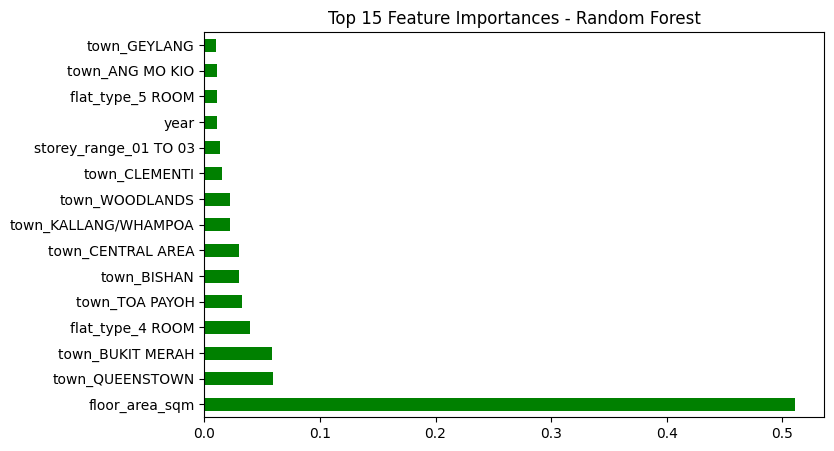

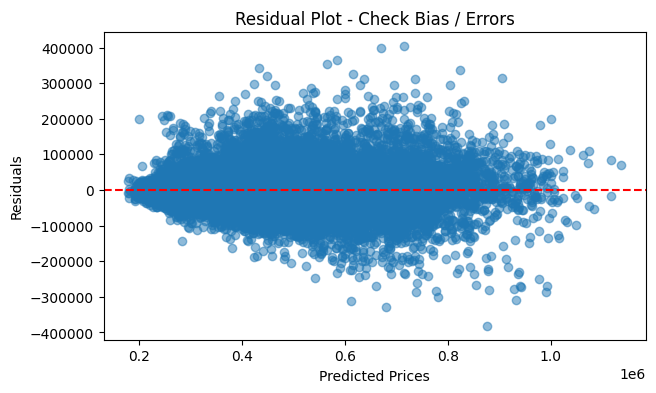

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
rf = best_rf_random
# Assuming you have a trained RandomForestRegressor model called 'rf'
# and predictions called 'y_pred' from that model

y_pred = rf.predict(X_test)
# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.nlargest(15).plot(kind='barh', figsize=(8,5), color='green')
plt.title("Top 15 Feature Importances - Random Forest")
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(7,4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot - Check Bias / Errors")
plt.show()


This code performs model interpretation and error analysis using the trained Random Forest model. First, it computes feature importance with rf.feature_importances_, which quantifies how much each feature contributes to reducing prediction error in the model. Visualizing the top 15 most important features as a horizontal bar chart helps in data exploration by revealing which variables have the greatest influence on the target, guiding future feature engineering or dimensionality reduction. Next, it calculates residuals (y_test - y_pred) and plots them against predicted values to form a residual plot, which helps identify patterns in errors such as bias, heteroscedasticity, or outliers. If residuals are randomly scattered around zero, it indicates the model is capturing patterns well, while visible trends or clusters can highlight systematic errors or missing information in the features. Together, these visualizations improve understanding of the dataset and the model’s behavior, helping diagnose model performance and informing further improvements.

# After Model visualisation

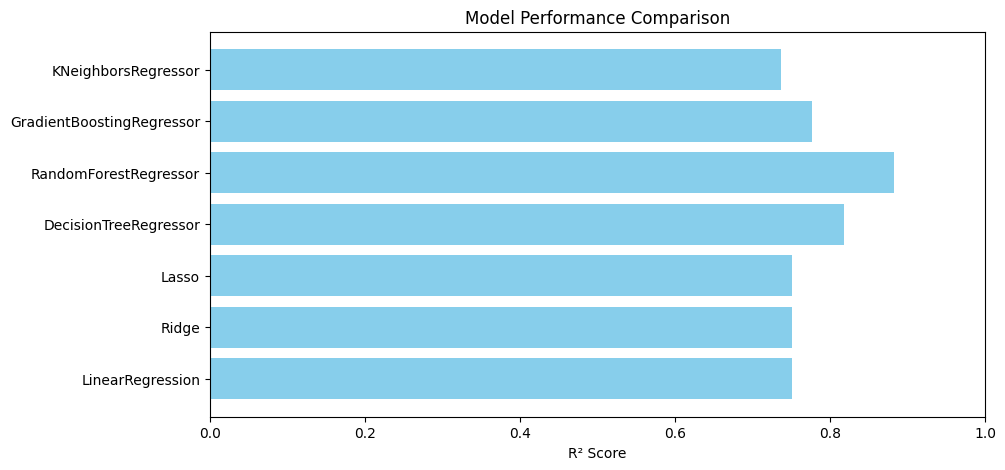

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.barh(model_names, r2_scores, color='skyblue')
plt.xlabel('R² Score')
plt.title('Model Performance Comparison')
plt.xlim(0, 1)  # To keep x-axis standard for R² (0 to 1)
plt.show()


This code generates a **horizontal bar chart** to compare the R² performance of different regression models visually. A 10×5‑inch figure is created for clarity, and `plt.barh` plots each model’s R² score (`r2_scores`) against its corresponding name (`model_names`) along the y‑axis. The bars are colored sky blue for better readability, while the x‑axis is constrained to the 0–1 range using `plt.xlim(0, 1)` to reflect the valid range of R² values and allow a fair side‑by‑side comparison. The x‑axis is labeled **“R² Score”**, and a clear title **“Model Performance Comparison”** summarizes the chart’s purpose. Finally, `plt.show()` displays the visualization, allowing you to instantly identify which model achieved the highest predictive performance.


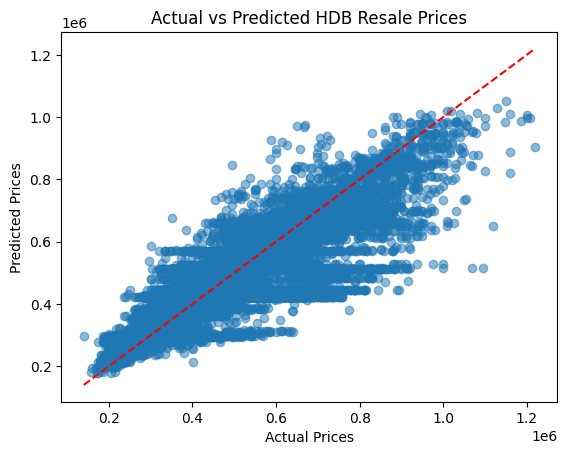

In [19]:
best_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted HDB Resale Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.show()


This scatter plot compares the **actual HDB resale prices** (x-axis) against the **predicted prices** from the trained Random Forest model (y-axis). Each point represents a resale transaction, and points lying **closer to the red dashed line** (the ideal `y = x` line) indicate **more accurate predictions**. A tight clustering around the diagonal suggests the model is performing well, while points **far from the line** highlight prediction errors or outliers. This visualization is crucial for **assessing model accuracy** and detecting any **systematic underprediction or overprediction trends**.


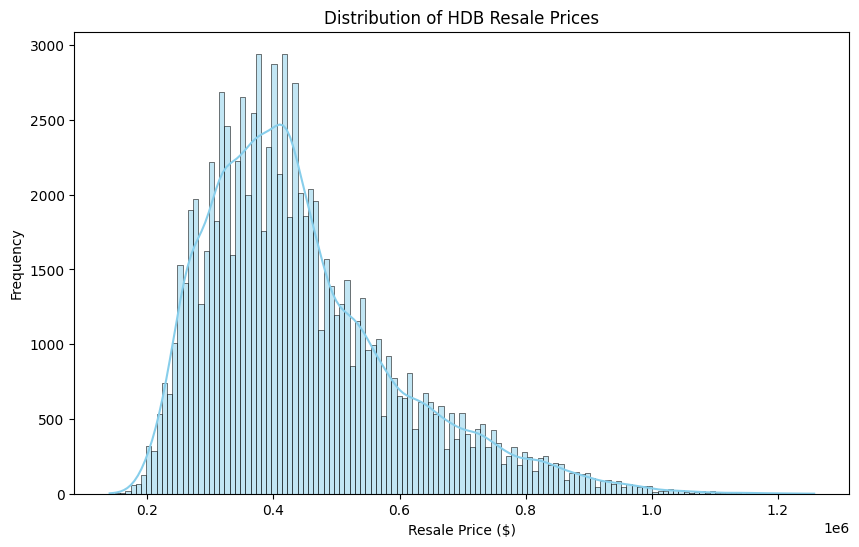

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['resale_price'], kde=True, color='skyblue')
plt.title('Distribution of HDB Resale Prices')
plt.xlabel('Resale Price ($)')
plt.ylabel('Frequency')
plt.show()


This histogram with a **kernel density estimate (KDE)** visualizes the **distribution of HDB resale prices**, showing how frequently different price ranges occur. The histogram bars represent the **count of transactions** within each price bin, while the smooth KDE curve overlays the **probability density**, helping to identify the central tendency and spread of the data. This visualization is useful for **detecting skewness, common price ranges, and potential outliers**, providing insights into market affordability and the overall structure of resale price patterns.


# Model prediction Visualisations

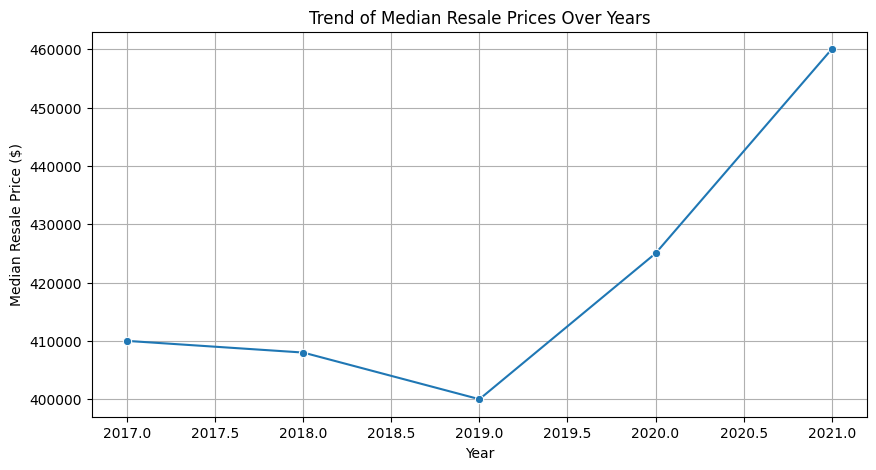

In [21]:
# If needed: recreate df with year and resale_price
yearly_trend = df.groupby('year')['resale_price'].median().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_trend, x='year', y='resale_price', marker='o')
plt.title('Trend of Median Resale Prices Over Years')
plt.xlabel('Year')
plt.ylabel('Median Resale Price ($)')
plt.grid(True)
plt.show()


This visualization shows the **trend of median HDB resale prices over the years**, providing insights into long-term market movements. By grouping the dataset by `year` and calculating the **median resale price** for each year, the plot reduces the impact of outliers and highlights the central price tendency in the market. The line chart with markers makes it easy to **identify periods of growth, stability, or decline**, helping to understand how historical factors, government policies, or market conditions may have influenced price fluctuations. This type of trend analysis is crucial for **predicting future pricing patterns** and supporting data-driven decision-making in property analysis.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Simulate sample data (replace this with your model prediction loop) ---
towns = ['ANG MO KIO', 'BEDOK', 'BISHAN']
flat_types = ['3 ROOM', '4 ROOM', '5 ROOM']
storey_ranges = ['01 TO 03', '04 TO 06', '07 TO 09']

years = list(range(2017, 2025))
months = list(range(1, 13))

# Fake predicted prices
np.random.seed(42)
sample_data = []
for town in towns:
    for flat in flat_types:
        for storey in storey_ranges:
            for year in years:
                sample_data.append({
                    'Town': town,
                    'Flat Type': flat,
                    'Storey Range': storey,
                    'Year': year,
                    'Predicted Price': np.random.randint(200_000, 800_000)
                })

df_pred = pd.DataFrame(sample_data)



The first code block begins by importing essential Python libraries for data handling and visualization: pandas for tabular data manipulation, matplotlib and seaborn for plotting, and NumPy for numerical operations. It then defines some sample data parameters, including a list of towns, flat types, and storey ranges, as well as a range of years and months. A fixed random seed is set using np.random.seed(42) to ensure that the simulated price data is reproducible every time the code is run. A nested loop is then used to simulate HDB predicted resale prices: for each combination of town, flat type, storey range, and year, a random integer price between 200,000 and 800,000 is generated and appended to a list as a dictionary. Finally, this list of dictionaries is converted into a pandas DataFrame (df_pred), which serves as a synthetic dataset for testing visualization and analysis of predicted housing prices without needing real model output.

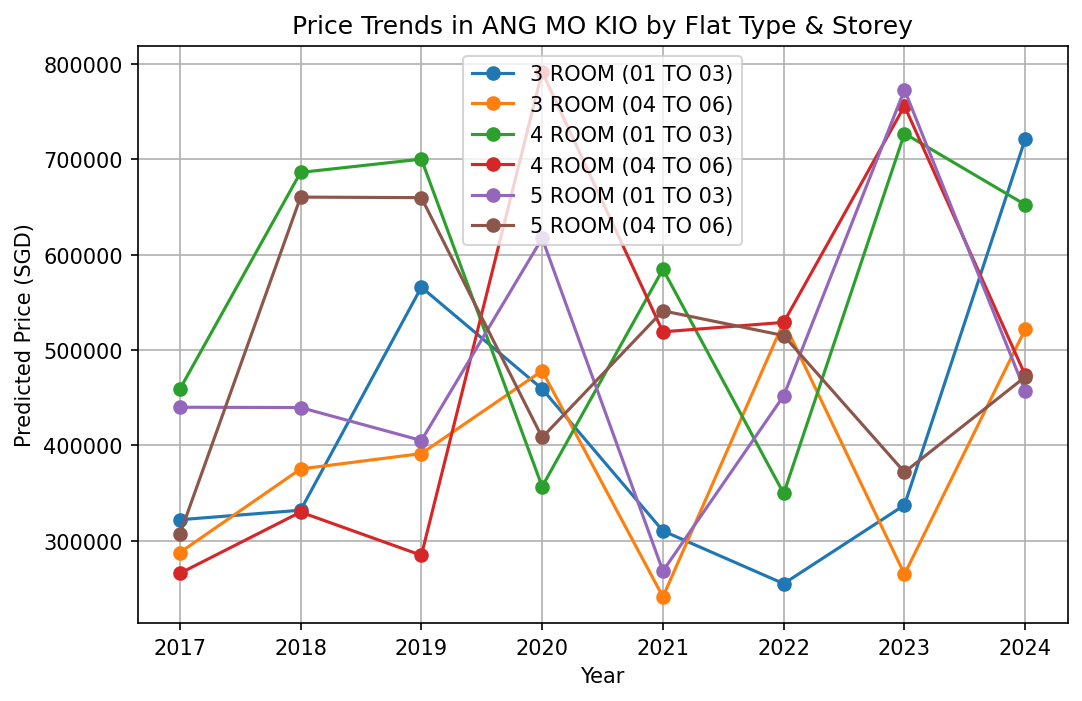

C:\Users\Ethan Gwee E-Rui\AppData\Local\Temp\ipykernel_19052\2654481358.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


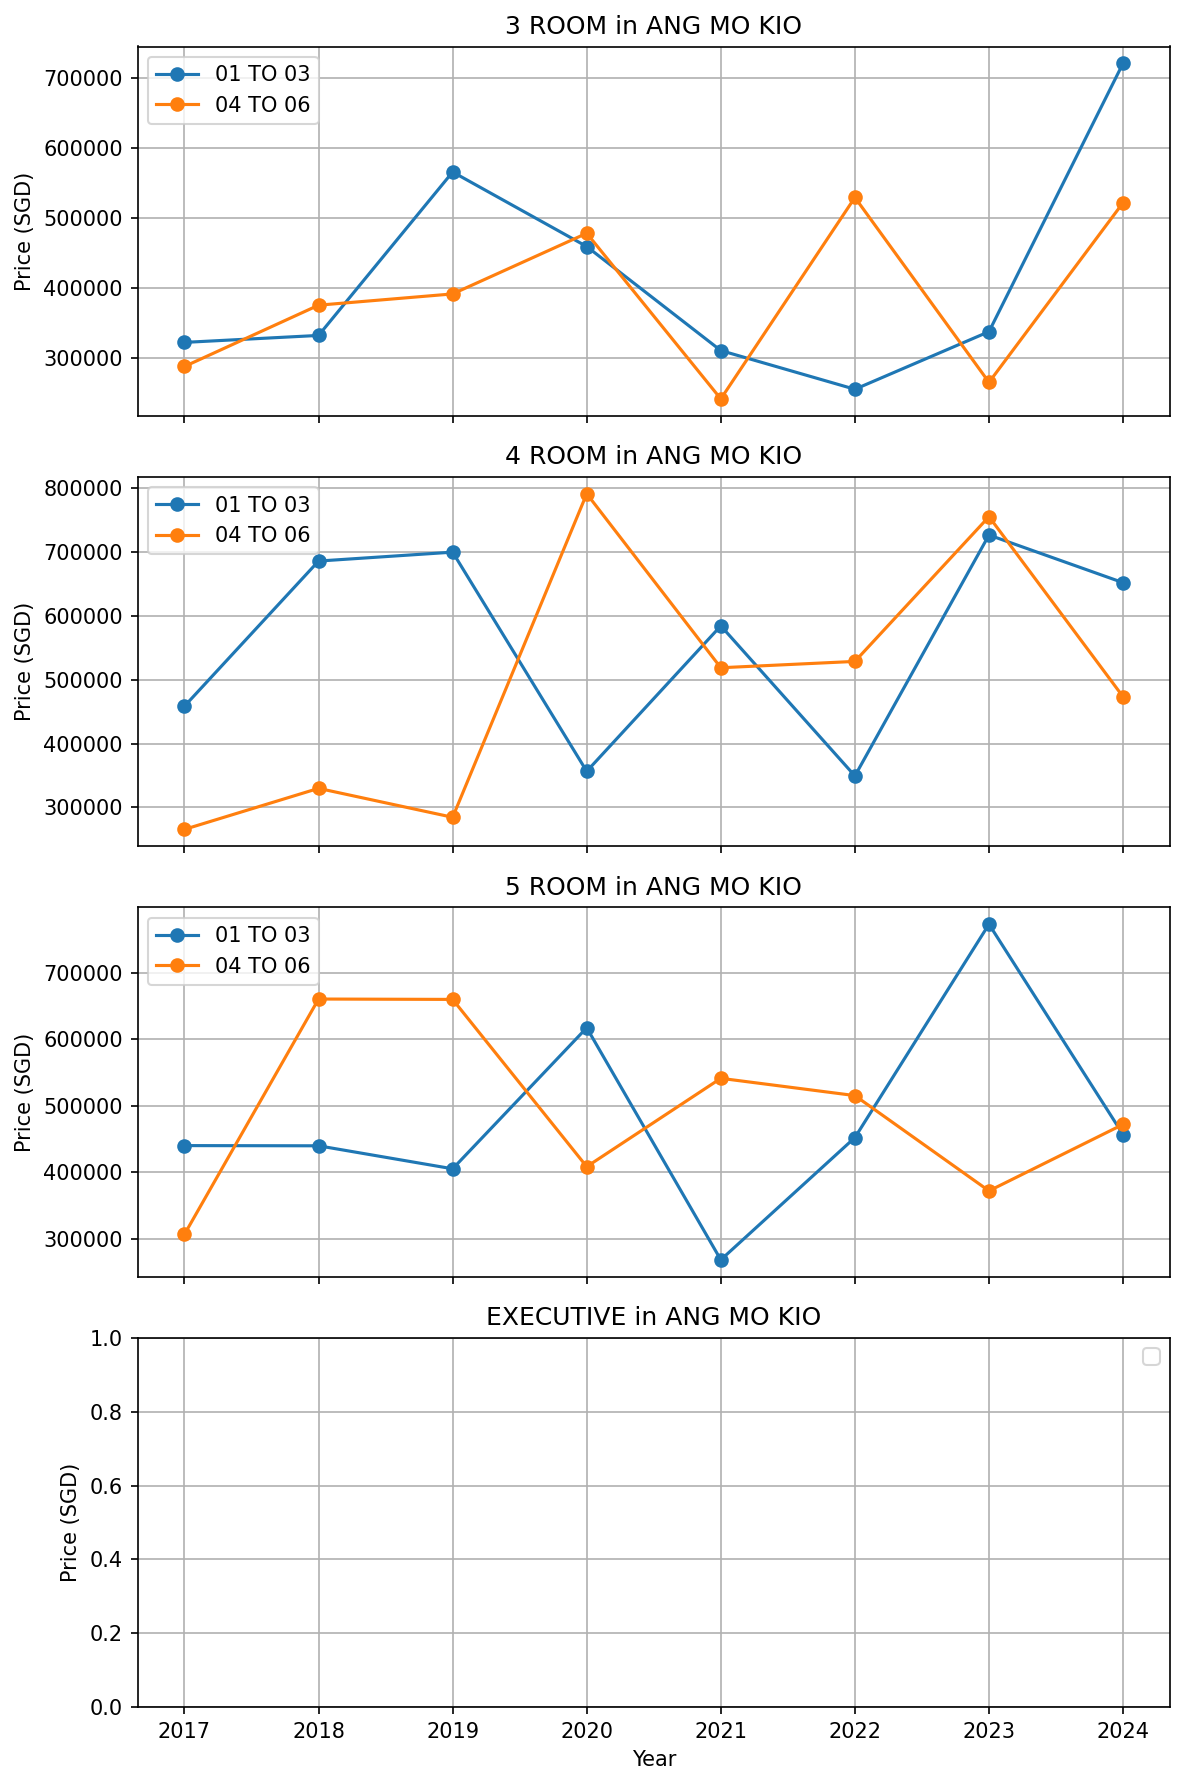

In [23]:
import matplotlib.pyplot as plt

# Variables to compare
town = 'ANG MO KIO'
flat_types = ['3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE']
storey_ranges = ['01 TO 03', '04 TO 06']  # you can add more

# 1️⃣ Combined Graph (all lines in one chart)
plt.figure(figsize=(8, 5), dpi=150)

for flat_type in flat_types:
    for storey_range in storey_ranges:
        subset = df_pred[
            (df_pred['Town'] == town) &
            (df_pred['Flat Type'] == flat_type) &
            (df_pred['Storey Range'] == storey_range)
        ]
        if not subset.empty:
            plt.plot(
                subset['Year'],
                subset['Predicted Price'],
                marker='o',
                label=f"{flat_type} ({storey_range})"
            )

plt.title(f"Price Trends in {town} by Flat Type & Storey")
plt.xlabel("Year")
plt.ylabel("Predicted Price (SGD)")
plt.grid(True)
plt.legend()
plt.show()


# 2️⃣ Multiple Subplots (each flat type separate)
fig, axes = plt.subplots(len(flat_types), 1, figsize=(8, 12), dpi=150, sharex=True)

for i, flat_type in enumerate(flat_types):
    ax = axes[i]
    for storey_range in storey_ranges:
        subset = df_pred[
            (df_pred['Town'] == town) &
            (df_pred['Flat Type'] == flat_type) &
            (df_pred['Storey Range'] == storey_range)
        ]
        if not subset.empty:
            ax.plot(subset['Year'], subset['Predicted Price'], marker='o', label=storey_range)
    
    ax.set_title(f"{flat_type} in {town}")
    ax.set_ylabel("Price (SGD)")
    ax.grid(True)
    ax.legend()

axes[-1].set_xlabel("Year")
plt.tight_layout()
plt.show()


This code block visualizes predicted resale price trends for the town of ANG MO KIO, focusing on selected flat types and storey ranges from the `df_pred` DataFrame. The first plot combines all flat type and storey range pairs into a single line chart, using nested loops to filter and plot each subset with distinct markers and labels, providing a clear overview of price trends over time with legends and gridlines. The second visualization breaks this down into multiple stacked subplots, one for each flat type, allowing for more detailed year-to-year comparisons within each category while sharing the same x-axis for consistency. Each subplot shows price trends for the different storey ranges, includes titles and y-axis labels, and uses legends for clarity. This dual visualization strategy offers both a holistic and a granular perspective on predicted price movements by flat type and floor level.


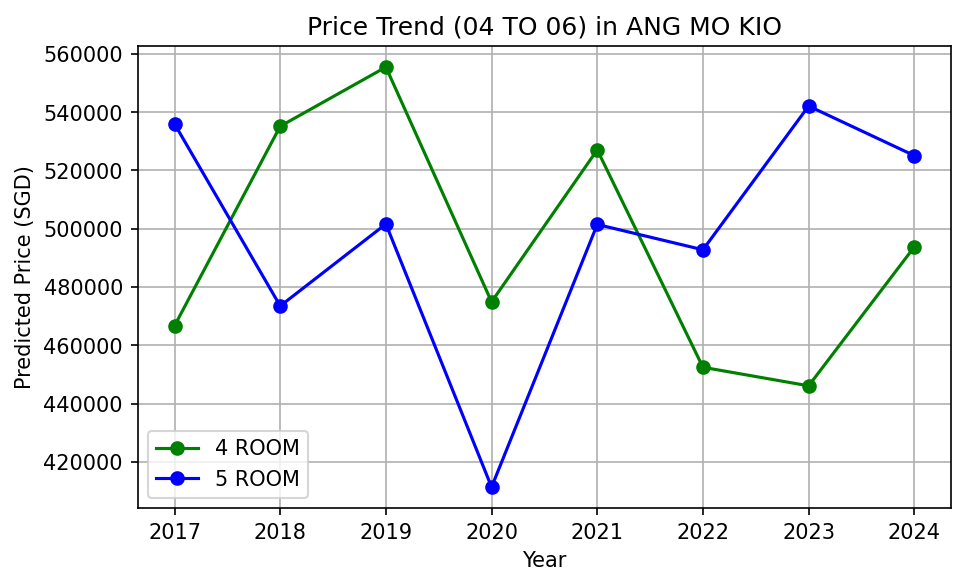

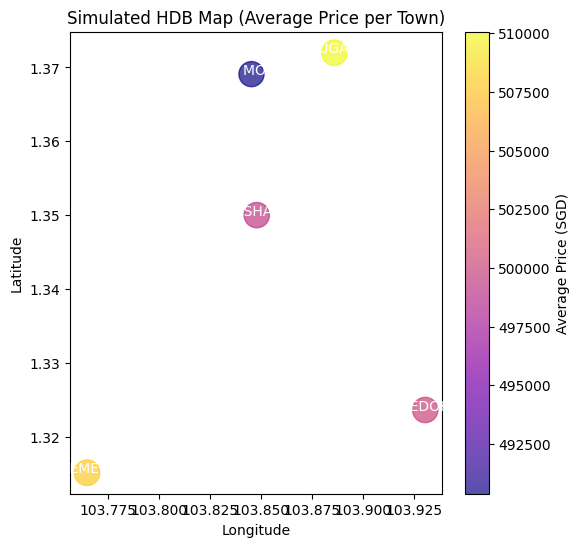

C:\Users\Ethan Gwee E-Rui\AppData\Local\Temp\ipykernel_19052\2001570271.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=map_df.sort_values('Average Price', ascending=True),


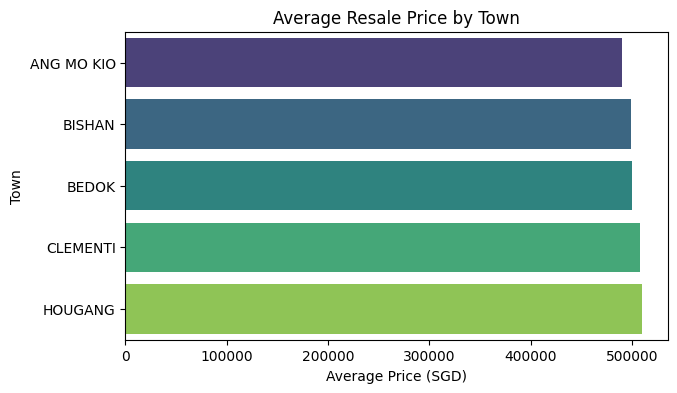

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# ---------------------------
# 1. SIMULATED DATA
# ---------------------------
towns = ['ANG MO KIO', 'BEDOK', 'BISHAN', 'CLEMENTI', 'HOUGANG']
flat_types = ['3 ROOM', '4 ROOM', '5 ROOM']
storey_ranges = ['01 TO 03', '04 TO 06', '07 TO 09']

years = list(range(2017, 2025))
months = list(range(1, 13))

data = []
for town in towns:
    for flat in flat_types:
        for storey in storey_ranges:
            for year in years:
                for month in months:
                    data.append({
                        'Town': town,
                        'Flat Type': flat,
                        'Storey Range': storey,
                        'Year': year,
                        'Month': month,
                        'Predicted Price': np.random.randint(200_000, 800_000)
                    })

df = pd.DataFrame(data)

# ---------------------------
# 2. PRICE PREDICTION TAB (YEARLY TREND)
# ---------------------------
town = 'ANG MO KIO'
flat1, flat2 = '4 ROOM', '5 ROOM'
storey = '04 TO 06'

fig, ax = plt.subplots(figsize=(7, 4), dpi=150)
subset1 = df[(df['Town']==town) & (df['Flat Type']==flat1) & (df['Storey Range']==storey)]
subset1.groupby('Year')['Predicted Price'].mean().plot(marker='o', color='green', ax=ax, label=flat1)

subset2 = df[(df['Town']==town) & (df['Flat Type']==flat2) & (df['Storey Range']==storey)]
subset2.groupby('Year')['Predicted Price'].mean().plot(marker='o', color='blue', ax=ax, label=flat2)

ax.set_title(f"Price Trend ({storey}) in {town}")
ax.set_xlabel("Year")
ax.set_ylabel("Predicted Price (SGD)")
ax.legend()
ax.grid(True)
plt.show()

# ---------------------------
# 3. MAP TAB (MULTIPLE AVERAGE PRICE GRAPHS)
# ---------------------------
# Simulate map coordinates & average prices

avg_price = df.groupby('Town')['Predicted Price'].mean().reset_index()
map_df = map_df.merge(avg_price, on='Town', how='left')
map_df.rename(columns={'Predicted Price': 'Average Price'}, inplace=True)

# Graph : Horizontal Bar (Average Price by Town)
fig, ax = plt.subplots(figsize=(7,4))
sns.barplot(data=map_df.sort_values('Average Price', ascending=True),
            x='Average Price', y='Town', palette='viridis', ax=ax)
ax.set_title("Average Resale Price by Town")
ax.set_xlabel("Average Price (SGD)")
plt.show()





This code block simulates a comprehensive scenario for HDB resale price analysis by generating a detailed dataset covering multiple towns, flat types, storey ranges, years, and months, with random predicted prices. It first visualizes yearly price trends comparing two flat types within the same town and storey range by plotting average predicted prices over time, revealing differences in price trajectories. Next, it creates a geospatial perspective by merging town-level average prices with simulated map coordinates, enabling visualization of price distribution across locations. The code then presents a horizontal bar chart ranking towns by their average predicted resale prices, enhancing interpretability with a color gradient. By combining temporal trend lines, geographic distribution, and comparative rankings, this block demonstrates a multi-faceted approach to understanding the dynamics and spatial variation of HDB resale prices.


# Model Deployment

In [27]:
import joblib

# After RandomizedSearchCV
best_model = random_search.best_estimator_

# Save the tuned model
joblib.dump(best_model, "resale_model.pkl")
print("✅ Tuned Random Forest model saved as resale_model.pkl")


✅ Tuned Random Forest model saved as resale_model.pkl


to run the py code use python -m streamlit run proj.py


# APPENDIX

import pandas as pd

input_dict = {
    'floor_area_sqm': [89.0],
    'year': [2021],
    'month_num': [1],
    'town_ANG MO KIO': [0],
    'town_BEDOK': [1],
    'town_BISHAN': [0],

    'town_BUKIT BATOK': [0],
    'town_BUKIT MERAH': [0],
    'town_BUKIT PANJANG': [0],
    'town_BUKIT TIMAH': [0],
    'town_CENTRAL AREA': [0],
    'town_CHOA CHU KANG': [0],
    'town_CLEMENTI': [0],
    'town_GEYLANG': [0],
    'town_HOUGANG': [0],
    'town_JURONG EAST': [0],
    'town_JURONG WEST': [0],
    'town_KALLANG/WHAMPOA': [0],
    'town_MARINE PARADE': [0],
    'town_PASIR RIS': [0],
    'town_PUNGGOL': [0],
    'town_QUEENSTOWN': [0],
    'town_SEMBAWANG': [0],
    'town_SENGKANG': [0],
    'town_SERANGOON': [0],
    'town_TAMPINES': [0],
    'town_TOA PAYOH': [0],
    'town_WOODLANDS': [0],
    'town_YISHUN': [0],
    'flat_type_1 ROOM': [0],
    'flat_type_2 ROOM': [0],
    'flat_type_3 ROOM': [0],
    'flat_type_4 ROOM': [1],
    'flat_type_5 ROOM': [0],
    'flat_type_EXECUTIVE': [0],
    'flat_type_MULTI-GENERATION': [0],
    'storey_range_01 TO 03': [0],
    'storey_range_04 TO 06': [1],
    'storey_range_07 TO 09': [0],
    'storey_range_10 TO 12': [0],
    'storey_range_13 TO 15': [0],
    'storey_range_16 TO 18': [0],
    'storey_range_19 TO 21': [0],
    'storey_range_22 TO 24': [0],
    'storey_range_25 TO 27': [0],
    'storey_range_28 TO 30': [0],
    'storey_range_31 TO 33': [0],
    'storey_range_34 TO 36': [0],
    'storey_range_37 TO 39': [0],
    'storey_range_40 TO 42': [0],
    'storey_range_43 TO 45': [0],
    'storey_range_46 TO 48': [0],
    'storey_range_49 TO 51': [0],
}

predicted_df = pd.DataFrame(input_dict)

predicted_price = model.predict(predicted_df)[0]
print(f"Predicted resale price: ${predicted_price:,.2f}")






This code snippet creates a single-row DataFrame predicted_df with all the required features already one-hot encoded and numerical columns filled in to represent a specific HDB flat (e.g., 89 sqm, year 2021, January, in BEDOK, 4-room flat, storey range 04 TO 06). It then uses your trained model to predict the resale price for this configuration and prints the result formatted as a currency value.

print(list(X_train.columns))

This line prints out a list of the column names from the training feature set X_train. It helps you verify which features are being used in the model, ensuring the data is properly prepared and all expected variables are included before training or evaluation.

This line prints out a list of the column names from the training feature set X_train. It helps you verify which features are being used in the model, ensuring the data is properly prepared and all expected variables are included before training or evaluation.